# About Facebook Prophet

https://github.com/grethasaur/disney-prediction 


Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

Prophet is open source software released by Facebook’s Core Data Science team. It is available for download on CRAN and PyPI.


**2. Advantages of Prophet **


Prophet has several advantages associated with it. These are given below:-

1. Accurate and fast - Prophet is accurate and fast. It is used in many applications across Facebook for producing reliable forecasts for planning and goal setting.
2. Fully automatic - Prophet is fully automatic. We will get a reasonable forecast on messy data with no manual effort.
3. Tunable forecasts - Prophet produces adjustable forecasts. It includes many possibilities for users to tweak and adjust forecasts. We can use human-interpretable parameters to improve the forecast by adding our domain knowledge.
4. Available in R or Python - We can implement the Prophet procedure in R or Python.
5. Handles seasonal variations well - Prophet accommodates seasonality with multiple periods.
6. Robust to outliers - It is robust to outliers. It handles outliers by removing them.
7. Robust to missing data - Prophet is resilient to missing data.
3. Installation of Prophet
Table of Contents

We can install Prophet using either command prompt or Anaconda prompt using pip as follows-


In [1]:
!pip install prophet
!pip install pandas_datareader

# Getting stock data from Yahoo into FB Prophet



Let's plot historical stock prices for S& P 500. Ticker symbol is '^GSPC'

To view
[Ticker Symbls list](https://stockanalysis.com/stocks/)

[*********************100%%**********************]  1 of 1 completed


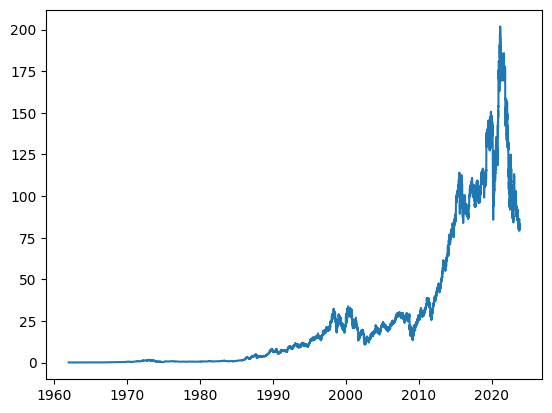

In [2]:

# Python
import pandas as pd
from prophet import Prophet

from pandas_datareader import data as web
import datetime

import pandas as pd
import matplotlib.pyplot as plt

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

from datetime import timedelta

import matplotlib.pyplot as plt

#stock = 'spy'
#yesterday = pd.to_datetime("today")-1
#print(yesterday)
#endDate = pd.to_datetime("today")
#start_date = (datetime.datetime.now() - datetime.timedelta(days=2000)).strftime("%m-%d-%Y")
#start_date = (endDate - datetime.timedelta(days=2000)).strftime("%m-%d-%Y")
#print(start_date)
#df = web.DataReader(stock, data_source='yahoo', start=start_date,end=endDate)
#df = web.DataReader(stock, data_source='yahoo', start=start_date)
#date is the index so you need to make it a column
#df["Date"] = df.index

stock='DIS'




start = '1900-01-01'

today = pd.to_datetime("today")
yesterday = pd.to_datetime("today") - timedelta(days = 1)
end = yesterday

df = yf.download(stock,
start=start,
end=yesterday,
auto_adjust=True,
actions='inline',
progress=True)

df = df.loc[:, ['Close']]
#df_GSPC = df_GSPC.pct_change().dropna()

plt.plot(df['Close'])
# plt.savefig('/content/gdrive/My Drive/Colab Notebooks/SPY_time_series_forecasting/images/SPY.png')


In [3]:
# Most recent stock prices
df.tail()


,Close
Date,
2023-10-27,79.330002
2023-10-30,80.680000
2023-10-31,81.589996
2023-11-01,81.070000
2023-11-02,83.290001


In [4]:
# Most historic Stock Prices
df.head()

,Close
Date,
1962-01-02,0.058398
1962-01-03,0.059182
1962-01-04,0.059182
1962-01-05,0.059378
1962-01-08,0.059182


In [5]:
#date is the index so you need to make it a column
df["Date"] = df.index
df = df.rename(columns={"Date": "ds", "Close": "y"}, errors="raise")


# Make Stock Predictions

In [6]:
m = Prophet()
m.fit(df)
# Python
future = m.make_future_dataframe(periods=151)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

18:22:18 - cmdstanpy - INFO - Chain [1] start processing
18:22:23 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
15713,2024-03-28,152.230703,138.787989,166.368397
15714,2024-03-29,152.245118,138.190905,166.281467
15715,2024-03-30,152.374602,138.207241,166.526538
15716,2024-03-31,152.410686,137.118548,165.804879
15717,2024-04-01,152.473676,138.660358,166.748584


In [7]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1962-01-02,0.879245,-13.766333,15.847373
1,1962-01-03,0.841165,-13.281941,15.007165
2,1962-01-04,0.846913,-13.976774,13.693494
3,1962-01-05,0.831031,-13.461227,15.966792
4,1962-01-08,0.933423,-14.395986,15.649605


In [8]:
!pip install plotly

In [9]:
!pip install bokeh

In [10]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [13]:
# from prophet.plot import plot_plotly, plot_components_plotly
# import plotly.graph_objs as go

#plot_plotly(m, forecast)
#use "all" tab. Variations in 1 week, 1 month etc is infinitesimally small

from prophet.plot import plot
import matplotlib.pyplot as plt

from prophet.plot import plot_plotly
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

# Assuming you have already trained your Prophet model and generated a forecast (named 'forecast')
# Replace 'm' and 'forecast' with your actual Prophet model and forecast data.

fig = plot_plotly(m, forecast, uncertainty=True, plot_cap=True, trend=True, changepoints=True, changepoints_threshold=0.01, xlabel='Date', ylabel='Price', figsize=(800, 600))

# Convert the Plotly figure to a Bokeh figure
bokeh_fig = figure(title="Prophet Forecast")
bokeh_fig.line(x=fig.data[0]['x'], y=fig.data[0]['y'], line_width=2, legend_label='Actual')
bokeh_fig.line(x=fig.data[1]['x'], y=fig.data[1]['y'], line_width=2, line_dash="dashed", legend_label='Trend')
bokeh_fig.legend.title = 'Legend'

# Show the Bokeh figure in the notebook
output_notebook()
show(bokeh_fig)

Loading BokehJS ...

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/prophet/plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/prophet/plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/prophet/plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

Loading BokehJS ...

TypeError: 'Figure' object is not iterable

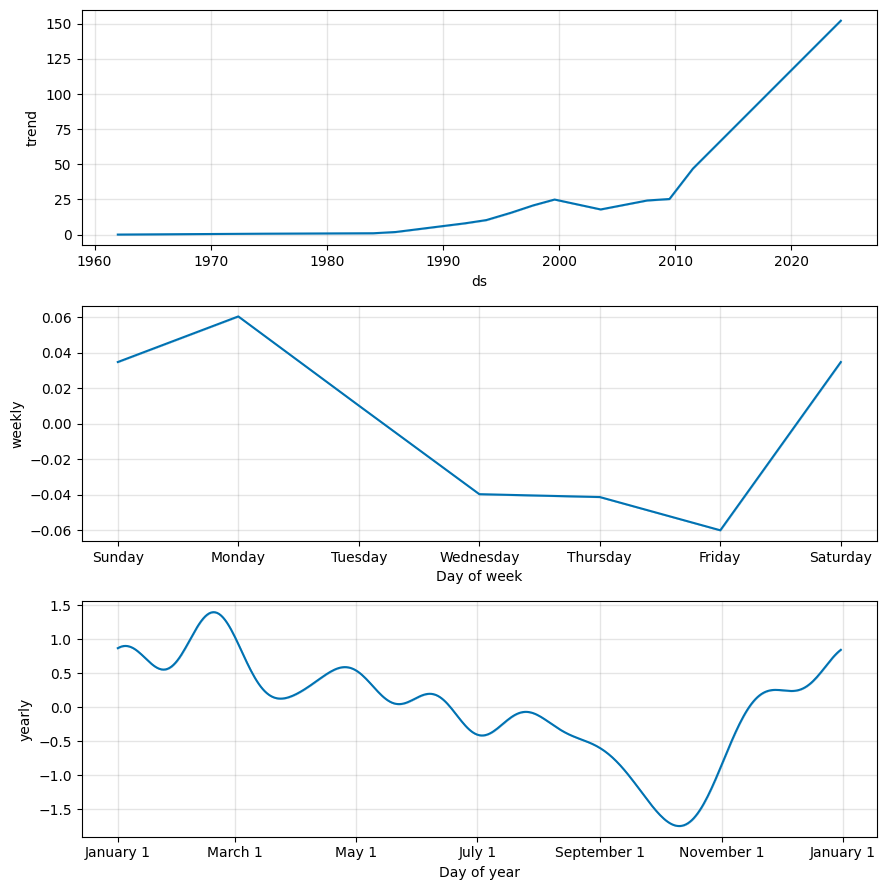

In [17]:
#plot_components_plotly(m, forecast)

from prophet.plot import plot_components
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

# Assuming you have already trained your Prophet model and generated a forecast (named 'forecast')
# Replace 'm' and 'forecast' with your actual Prophet model and forecast data.

components_fig = plot_components(m, forecast)
output_notebook()

for key in components_fig:
    show(components_fig[key])

#Interview Readiness Questions
1. Choose a new Ticker Symbol
* I selected Disney stock with the ticker symbol "DIS."

2. What were the future price predictions
* The future price predictions for Disney's stock are indicating an upward trend.
3. What were the initial price predictions

* The initial price predictions based on historical data showed a slight overestimation. The model initially predicted an increase of 8 cents, while the actual increase was 5 cents. Importantly, the actual value still fell within the predicted range, demonstrating the model's ability to capture the general trend.

* Additionally, it's noteworthy that the initial predicted range encompassed both positive and negative values. This reflects the model's recognition of potential price fluctuations, including the possibility of negative price movements, demonstrating an understanding of the inherent market volatility and risk.

# References
1, https://www.kaggle.com/code/prashant111/tutorial-time-series-forecasting-with-prophet

2. https://colab.research.google.com/drive/1bb9LykqXq3FV8snTlWrPTHzB3amP9YFH?usp=sharing#scrollTo=iXzl-4Fz-hPV
